## 1) Importing Libraries and dataset

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

url = 'https://raw.githubusercontent.com/aniruddha7599/FoML-Project-STD-NRM/refs/heads/main/NAFLD%20dataset%20for%20FOML.csv'

data = pd.read_csv(url)
data.head()

,Patient No.,Age,"Gender (Female=1, Male=2)",Height (cm),Weight (kg),Body Mass Index,Waist Circumference (cm),Hip Circumference (cm),"Diabetes (No=0, Yes=1)","Smoking Status (No Smoking=0, Smoking=1)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"
0,1,60,1,150,80,35.56,119.0,104.0,0,2.0,1
1,2,55,1,154,73,30.78,101.0,98.0,0,1.0,0
2,3,53,2,170,101,34.95,116.0,112.0,1,2.0,1
3,4,33,2,175,95,31.02,114.0,114.0,1,2.0,1
4,5,23,2,162,68,25.91,101.0,97.0,0,2.0,0


In [137]:
data = data.drop('Patient No.', axis=1)

In [138]:
# Create a new column with binary values for "Smoking Status" & "Gender"
data['Smoking Status(Not Smoking=0, Smoking=1)'] = data['Smoking Status (No Smoking=0, Smoking=1)'].apply(lambda x: 0 if x == 1 else 1).astype(int)
data['Gender (Female=0, Male=1)'] = data['Gender (Female=1, Male=2)'].apply(lambda x: 0 if x == 1 else 1).astype(int)

# Drop the original "Smoking Status" column with 3 values & "Gender (Female=1, Male=2)"
data = data.drop('Smoking Status (No Smoking=0, Smoking=1)', axis=1)
data = data.drop('Gender (Female=1, Male=2)', axis=1)
# Display the first few rows of the modified DataFrame to verify
data.head()

,Age,Height (cm),Weight (kg),Body Mass Index,Waist Circumference (cm),Hip Circumference (cm),"Diabetes (No=0, Yes=1)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)","Smoking Status(Not Smoking=0, Smoking=1)","Gender (Female=0, Male=1)"
0,60,150,80,35.56,119.0,104.0,0,1,1,0
1,55,154,73,30.78,101.0,98.0,0,0,0,0
2,53,170,101,34.95,116.0,112.0,1,1,1,1
3,33,175,95,31.02,114.0,114.0,1,1,1,1
4,23,162,68,25.91,101.0,97.0,0,0,1,1


In [139]:
# Create a new order for the columns by swapping the last and second last columns
columns = list(data.columns)
columns[-2], columns[-1] = columns[-1], columns[-2]  # Swap the last two columns

# Reorder the DataFrame
data = data[columns]

# Display the modified DataFrame to verify the change
data.head()

,Age,Height (cm),Weight (kg),Body Mass Index,Waist Circumference (cm),Hip Circumference (cm),"Diabetes (No=0, Yes=1)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)","Gender (Female=0, Male=1)","Smoking Status(Not Smoking=0, Smoking=1)"
0,60,150,80,35.56,119.0,104.0,0,1,0,1
1,55,154,73,30.78,101.0,98.0,0,0,0,0
2,53,170,101,34.95,116.0,112.0,1,1,1,1
3,33,175,95,31.02,114.0,114.0,1,1,1,1
4,23,162,68,25.91,101.0,97.0,0,0,1,1


In [140]:
data.columns

Index(['Age', 'Height (cm)', 'Weight (kg)', 'Body Mass Index',
       'Waist Circumference (cm)', 'Hip Circumference (cm)',
       'Diabetes (No=0, Yes=1)',
       'Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)',
       'Gender (Female=0, Male=1)',
       'Smoking Status(Not Smoking=0, Smoking=1)'],
      dtype='object')

In [141]:
data.dtypes

Age                                                                          int64
Height (cm)                                                                  int64
Weight (kg)                                                                  int64
Body Mass Index                                                            float64
Waist Circumference (cm)                                                   float64
Hip Circumference (cm)                                                     float64
Diabetes (No=0, Yes=1)                                                       int64
Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)      int64
Gender (Female=0, Male=1)                                                    int32
Smoking Status(Not Smoking=0, Smoking=1)                                     int32
dtype: object

In [142]:
data.describe()

,Age,Height (cm),Weight (kg),Body Mass Index,Waist Circumference (cm),Hip Circumference (cm),"Diabetes (No=0, Yes=1)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)","Gender (Female=0, Male=1)","Smoking Status(Not Smoking=0, Smoking=1)"
count,605.000000,605.000000,605.000000,605.000000,576.000000,598.000000,605.000000,605.000000,605.000000,605.000000
mean,46.302479,164.790083,86.403306,31.868711,109.440972,104.306020,0.371901,0.676033,0.530579,0.558678
std,10.646148,9.920240,14.379183,5.106853,10.588755,10.385775,0.483712,0.468375,0.499477,0.496956
min,18.000000,135.000000,48.000000,18.290000,63.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,157.000000,78.000000,28.610000,102.000000,98.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,165.000000,85.000000,31.210000,108.000000,104.000000,0.000000,1.000000,1.000000,1.000000
75%,54.000000,172.000000,94.000000,34.520000,115.000000,110.000000,1.000000,1.000000,1.000000,1.000000
max,71.000000,193.000000,158.000000,56.000000,155.000000,147.000000,1.000000,1.000000,1.000000,1.000000


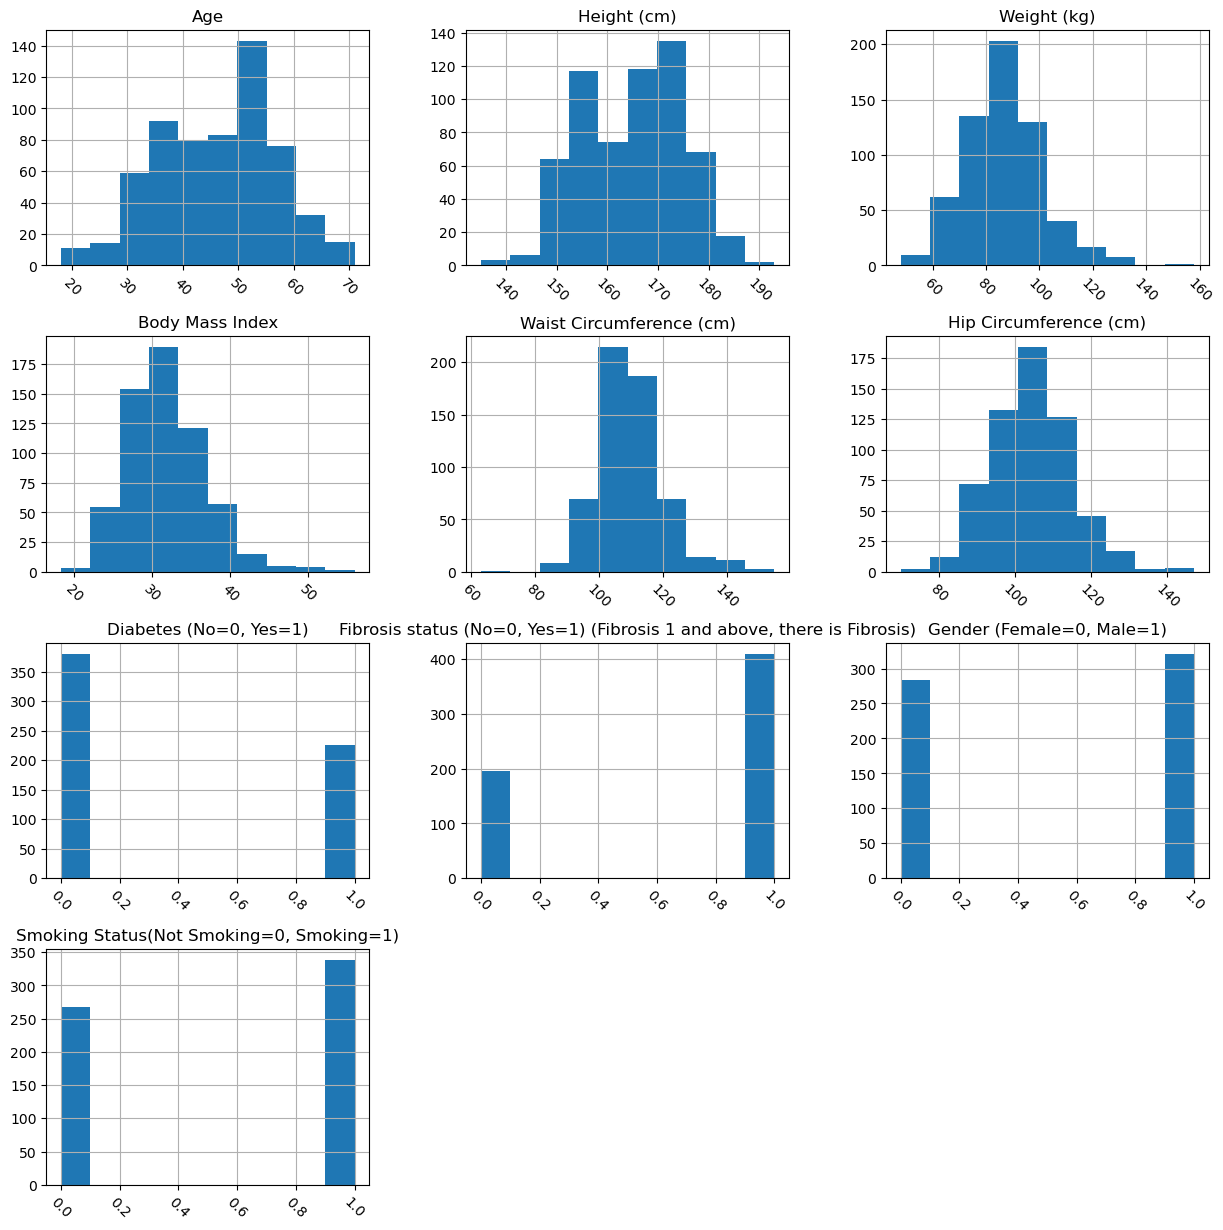

In [143]:
data.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

## Bar plots for categorical features

In [144]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender (Female=0, Male=1)', data=data)

<Axes: xlabel='count', ylabel='Gender (Female=0, Male=1)'>

##### We can see the number of males and Female data points are almost equal

In [145]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr())


<Axes: >

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 10 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Age                                                                      605 non-null    int64  
 1   Height (cm)                                                              605 non-null    int64  
 2   Weight (kg)                                                              605 non-null    int64  
 3   Body Mass Index                                                          605 non-null    float64
 4   Waist Circumference (cm)                                                 576 non-null    float64
 5   Hip Circumference (cm)                                                   598 non-null    float64
 6   Diabetes (No=0, Yes=1)                                                   6

In [147]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Age                                                                         0
Height (cm)                                                                 0
Weight (kg)                                                                 0
Body Mass Index                                                             0
Waist Circumference (cm)                                                   29
Hip Circumference (cm)                                                      7
Diabetes (No=0, Yes=1)                                                      0
Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)     0
Gender (Female=0, Male=1)                                                   0
Smoking Status(Not Smoking=0, Smoking=1)                                    0
dtype: int64


## We can see we have some missing values in "Waist Circumference" and "Hip Circumference"

## 2) Missing Value Treatment

In [148]:
# Fill missing values with the mean
data = data.fillna(data.mean())  # Replace missing values with the mean

# Verify that there are no missing values left
print("\nMissing values after treatment:")
data.isnull().sum()



Missing values after treatment:


Age                                                                        0
Height (cm)                                                                0
Weight (kg)                                                                0
Body Mass Index                                                            0
Waist Circumference (cm)                                                   0
Hip Circumference (cm)                                                     0
Diabetes (No=0, Yes=1)                                                     0
Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)    0
Gender (Female=0, Male=1)                                                  0
Smoking Status(Not Smoking=0, Smoking=1)                                   0
dtype: int64

## We can see now there are no missing values left

## 3) Outlier Detection

In [149]:
def outlier_iqr(data):
    total_outliers = 0
    outlier_summary = {}
    numerical_columns = ['Age', 'Gender (Female=0, Male=1)', 'Height (cm)', 'Weight (kg)','Body Mass Index', 'Waist Circumference (cm)', 'Hip Circumference (cm)' ,'Diabetes (No=0, Yes=1)', 'Smoking Status(Not Smoking=0, Smoking=1)']
    # Iterate over each numeric column
    for col in numerical_columns:
        q25, q75 = np.quantile(data[col], 0.25), np.quantile(data[col], 0.75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off

        # Find outliers below and above
        outliers_below = data[data[col] < lower].shape[0]
        outliers_above = data[data[col] > upper].shape[0]

        # Total outliers for this column
        total_outliers_for_col = outliers_below + outliers_above
        total_outliers += total_outliers_for_col

        # Store the outlier count for this column
        outlier_summary[col] = total_outliers_for_col

        # Print details for each column

    print(f'Total outliers across all columns: {total_outliers}')
    return outlier_summary
outlier_iqr(data)

Total outliers across all columns: 61


{'Age': 0,
 'Gender (Female=0, Male=1)': 0,
 'Height (cm)': 0,
 'Weight (kg)': 15,
 'Body Mass Index': 16,
 'Waist Circumference (cm)': 19,
 'Hip Circumference (cm)': 11,
 'Diabetes (No=0, Yes=1)': 0,
 'Smoking Status(Not Smoking=0, Smoking=1)': 0}

## 4) Outlier Treatment & Visualization

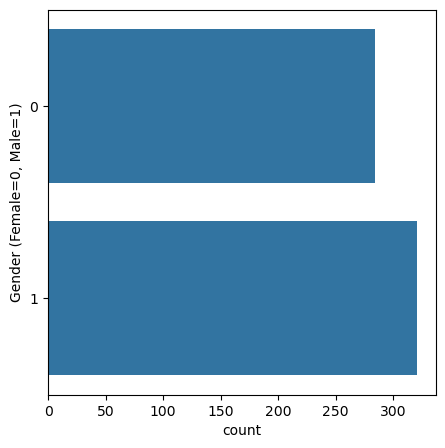

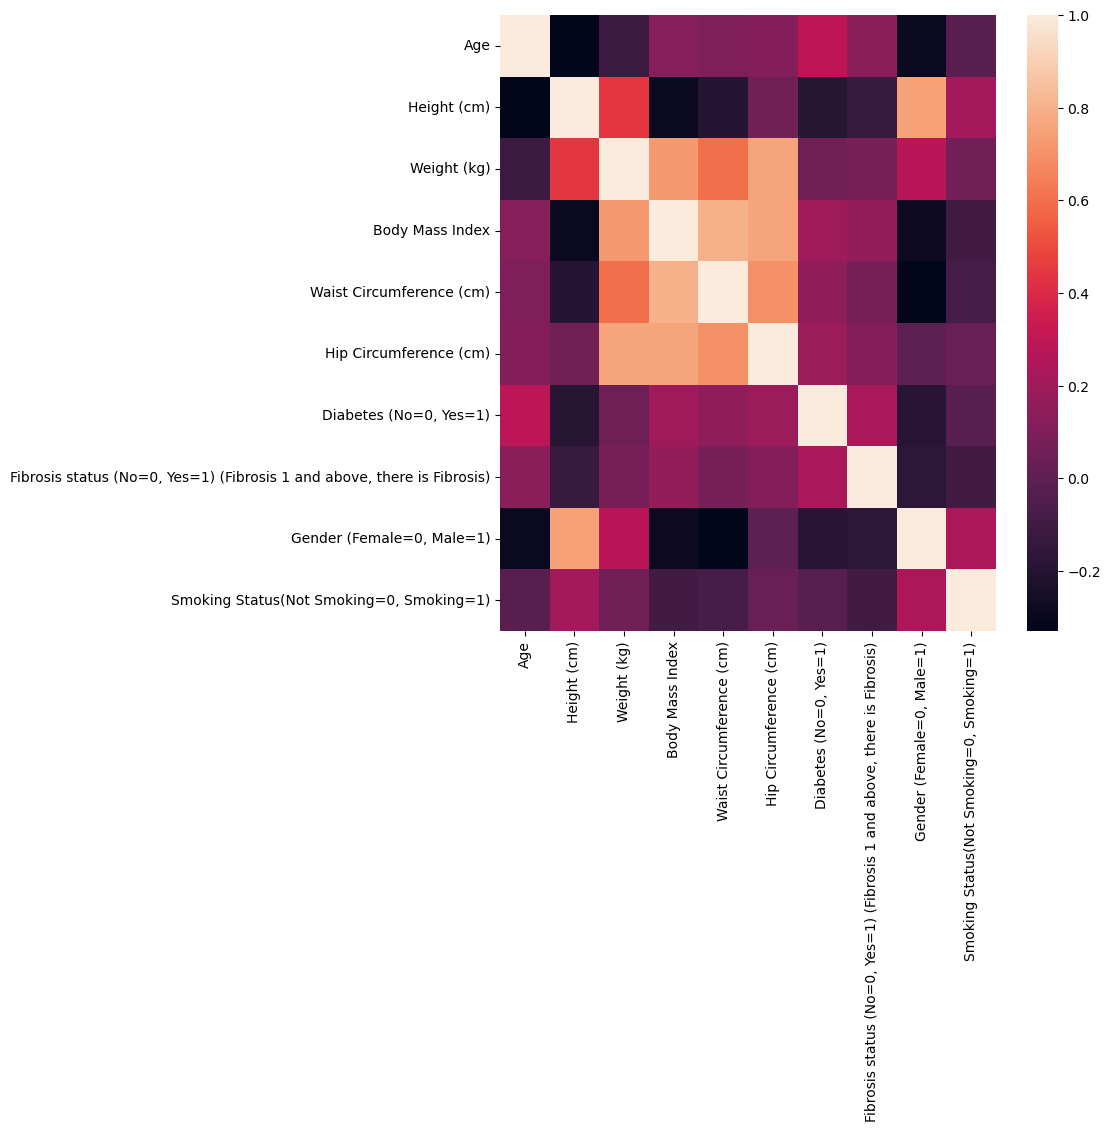

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to cap outliers at 3-sigma
def cap_outliers_3_sigma(data):
    capped_df = data.copy()
    for column in data.select_dtypes(include=[np.number]):  # Apply only to numeric columns
        mean = data[column].mean()
        std = data[column].std()
        lower_limit = mean - 3 * std
        upper_limit = mean + 3 * std
        capped_df[column] = np.clip(data[column], lower_limit, upper_limit)
    return capped_df

# Cap outliers in the data
data_2 = cap_outliers_3_sigma(data)

# Visualize the distribution of each numeric column before and after outlier treatment
numeric_columns = data_2.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 20))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, 2 * i - 1)
    sns.kdeplot(data[column].dropna(), color='blue', label='Original', fill=True)
    plt.title(f'{column} - Before Outlier Treatment')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

    plt.subplot(len(numeric_columns), 2, 2 * i)
    sns.kdeplot(data_2[column].dropna(), color='green', label='After 3-Sigma Capping', fill=True)
    plt.title(f'{column} - After Outlier Treatment')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


## Here we can see that the data Distribution for each column is almost same as it had before treating the data, hence outlier treatment has not changed the nature of data and we can further proceed with the modifed data

## 5) Standarizing and Normalizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
input_col = ['Age', 'Height (cm)', 'Weight (kg)','Body Mass Index', 'Waist Circumference (cm)', 'Hip Circumference (cm)']

In [ ]:
# Standardization
scaler = StandardScaler()
data_2_standardized = scaler.fit_transform(data_2[input_col]) # Pass input_col directly
data_2_standardized = pd.DataFrame(data_2_standardized, columns=input_col) # Pass input_col directly
df = data_2_standardized
data_2.head(5)


In [ ]:
df.head(5)

In [ ]:
columns_to_concat = data_2[['Gender (Female=0, Male=1)' , 'Diabetes (No=0, Yes=1)', 'Smoking Status(Not Smoking=0, Smoking=1)', "Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"]]
df = pd.concat([df, columns_to_concat], axis=1)
df.head(5)

## Now Our data is ready to be modelled using various Machine Learning Techniques. Henceforth This will be our primary data for training and testing purpose

In [ ]:
data.to_csv('my_dataframe.csv', index=False)